In [57]:
%ls

DS_project_chickfila.ipynb  dunkin.csv
chick-fil-a-nutrition.csv   starbucks.csv
ds_project.ipynb            starbucks_modified.csv


In [58]:
import pandas as pd

df = pd.read_csv("chick-fil-a-nutrition.csv")
df.shape

(290, 12)

In [59]:
df.head()

,Menu,Serving size,Calories,Fat (G),Sat. Fat (G),Trans Fat (G),Cholesterol (MG),Sodium (MG),Carbohydrates (G),Fiber (G),Sugar (G),Protein (G)
0,Chick-fil-A® Chicken Biscuit,153g,460.0,23.0,8.0,0.0,45,1510,45,2,6,19
1,Chick-fil-A Chick-n-Minis™,127g,360.0,13.0,4.0,0.0,60,1050,41,2,8,19
2,Egg White Grill,172g,290.0,8.0,3.5,0.0,60,980,30,1,2,26
3,Hash Brown Scramble Burrito,302g,700.0,40.0,12.0,0.5,415,1750,51,3,2,34
4,Hash Brown Scramble Bowl,233g,470.0,30.0,9.0,0.0,415,1340,19,2,2,29


# Descriptive Statistics
- Calories: On average, menu items contain about 436 calories, with a wide range from 0 to 9,850 calories, indicating some outliers or perhaps catering options.
- Fat: The average fat content is 20.8 grams, with a maximum of 624 grams, again suggesting some extreme values possibly from bulk orders.

- Saturated Fat: Averages 7 grams per item, with a significant max of 355 grams.

- Cholesterol: Average cholesterol content is approximately 74.4 mg, with items ranging up to 1,500 mg.

- Sodium: On average, items contain 842.3 mg of sodium, with a startling maximum of 26,050 mg, highlighting some very high-sodium options.- 

- Carbohydrates: Average at 46.6 grams, with a broad range up to 616 grams.

- Protein: Average protein content is 17.4 grams, with a wide range up to 442 grams.

In [60]:
# Calculate descriptive statistics for major nutritional facts
descriptive_stats = df[['Calories', 'Fat (G)', 'Sat. Fat (G)', 'Cholesterol (MG)', 
                          'Sodium (MG)', 'Carbohydrates (G)', 'Protein (G)']].describe()

descriptive_stats


,Calories,Fat (G),Sat. Fat (G),Cholesterol (MG),Sodium (MG),Carbohydrates (G),Protein (G)
count,290.000000,290.00000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,435.758621,20.80000,7.036207,74.413793,842.344828,46.620690,17.413793
std,765.993787,47.77937,25.774868,141.709781,1943.963646,83.883225,34.113912
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,1.12500,0.000000,0.000000,76.250000,9.250000,1.000000
50%,270.000000,9.00000,2.500000,25.000000,395.000000,28.000000,10.000000
75%,540.000000,26.00000,8.000000,85.000000,1145.000000,44.750000,28.000000
max,9850.000000,624.00000,355.000000,1500.000000,26050.000000,616.000000,442.000000


# Bar chart

displays the average nutritional values of Chick-fil-A menu items for ar ange of major nutritional facts
including calories, fat, saturated fat, cholesterol, sodium, carboyhydrates, and protein

This visualization helps us quickly grasp the overall nutritional composition of the menu

- **Sodium & Carbs**: stand out as the nutrients with the highest average values, which is typical for fast food menus
- **Calories & Fat**: also show significant average values
- **Protein**: while lower than carbs and sodium on average, still a significant component, indicating the presence of protein-rich options
- **Saturated Fat & Cholesterol**: have lower average values compared to other nutrients

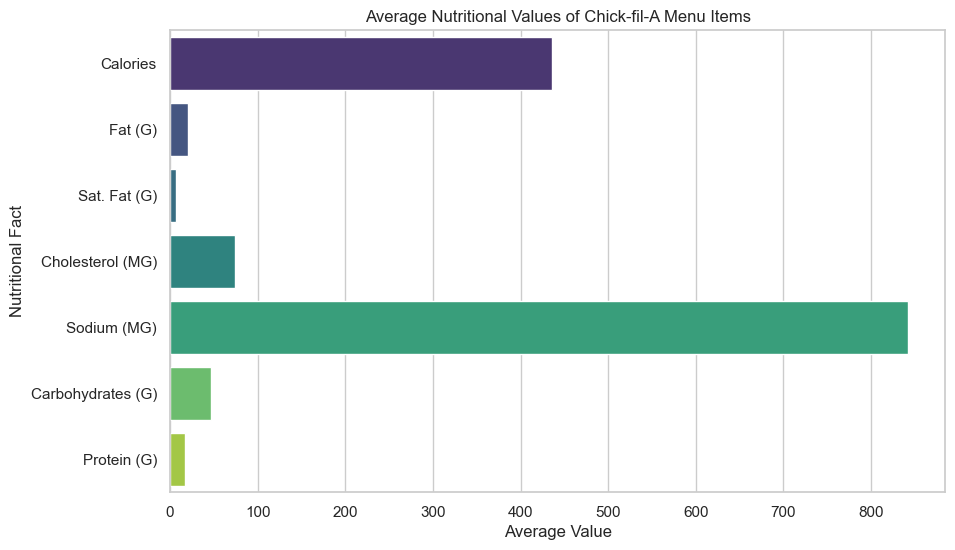

In [61]:
# Calculate the mean of major nutritional facts
nutritional_means = df[['Calories', 'Fat (G)', 'Sat. Fat (G)', 'Cholesterol (MG)', 
                          'Sodium (MG)', 'Carbohydrates (G)', 'Protein (G)']].mean().reset_index()

# Rename columns for clarity
nutritional_means.columns = ['Nutritional Fact', 'Average Value']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Value', y='Nutritional Fact', data=nutritional_means, palette='viridis')
plt.title('Average Nutritional Values of Chick-fil-A Menu Items')
plt.xlabel('Average Value')
plt.ylabel('Nutritional Fact')
plt.show()


# Category-Specific Analysis
- see how nutritional profiles vary across different types of menu items.
- since the current dataset doesn't explicitly include item categoriese, we will categorize them based on item names

simplified approach:
- Breakfast items might include keywords like "Egg", "Biscuit", "Breakfast", "Bacon", "Sausage", "Burrito".
- Sandwiches could be identified by keywords like "Sandwich", "Chicken", "Deluxe".
- Salads might include the word "Salad".
- Sides could include "Fries", "Soup", "Fruit", "Yogurt".
- Desserts might have "Cookie", "Brownie", "Ice Cream", "Sundae", "Shake".
- Beverages could include "Coke", "Drink", "Lemonade", "Coffee", "Tea".
- Other includes itmes that didn't match any of the keywords used for categorization

In [62]:
# Define a simple function to categorize menu items based on keywords
def categorize_item(item_name):
    breakfast_keywords = ["Egg", "Biscuit", "Breakfast", "Bacon", "Sausage", "Burrito"]
    sandwich_keywords = ["Sandwich", "Deluxe"]
    salad_keywords = ["Salad"]
    side_keywords = ["Fries", "Soup", "Fruit", "Yogurt"]
    dessert_keywords = ["Cookie", "Brownie", "Ice Cream", "Sundae", "Shake"]
    beverage_keywords = ["Coke", "Drink", "Lemonade", "Coffee", "Tea"]
    
    item_name = item_name.lower()  # Convert to lower case for comparison
    if any(keyword.lower() in item_name for keyword in breakfast_keywords):
        return "Breakfast"
    elif any(keyword.lower() in item_name for keyword in sandwich_keywords):
        return "Sandwich"
    elif any(keyword.lower() in item_name for keyword in salad_keywords):
        return "Salad"
    elif any(keyword.lower() in item_name for keyword in side_keywords):
        return "Side"
    elif any(keyword.lower() in item_name for keyword in dessert_keywords):
        return "Dessert"
    elif any(keyword.lower() in item_name for keyword in beverage_keywords):
        return "Beverage"
    else:
        return "Other"

# Apply the categorization function to each menu item
df['Category'] = df['Menu'].apply(categorize_item)

# Display the distribution of categories to check our categorization
category_distribution = df['Category'].value_counts()
category_distribution


Category
Other        125
Beverage      50
Salad         34
Sandwich      25
Breakfast     20
Side          20
Dessert       16
Name: count, dtype: int64

# Adjust the nutritional values to a common basis

- Normalize nutritional values to a per 100g basis
- enables direct comparison of the nutritional density of menu items across different categories

**Beverages**: Lowest in almost all nutritional values per 100g, especially low in calories, fat, and protein, which is expected for liquid items.

**Breakfast**: Highest in cholesterol and high in calories, fat, and saturated fat per 100g, indicating a richer, denser nutritional profile typical of breakfast items that include eggs and bacon.

**Desserts**: High in carbohydrates and saturated fat per 100g, reflecting their sugary and rich nature.

**Salads**: Lower in calories compared to other solid food categories but higher in fat per 100g than might be expected, possibly due to dressings and added toppings.

**Sandwiches**: Moderate in calories and protein but lower in fat and cholesterol per 100g compared to breakfast items, making them a relatively balanced option.

**Sides**: Lower in calories and fat per 100g, with a relatively higher carbohydrate content, which fits the profile of items like fries or fruit cups.

In [63]:
# First, we need to convert the 'Serving size' column to numeric values representing the weight in grams.
# The serving size column is currently in a format like '153g', so we'll extract the numeric part.

# Extract the numeric part of the serving size (assuming all serving sizes are in grams and formatted as '###g')
df['Serving Size (g)'] = df['Serving size'].str.extract('(\d+)').astype(float)

# Calculate the nutritional values per 100g for each item
nutritional_facts_per_100g = ['Calories', 'Fat (G)', 'Sat. Fat (G)', 'Cholesterol (MG)', 
                              'Sodium (MG)', 'Carbohydrates (G)', 'Protein (G)']

for fact in nutritional_facts_per_100g:
    df[f'{fact} per 100g'] = (df[fact] / df['Serving Size (g)']) * 100

# Now, recalculate the mean of these normalized nutritional facts by category
category_normalized_nutritional_means = df.groupby('Category')[[f'{fact} per 100g' for fact in nutritional_facts_per_100g]].mean()

# Reset index to make 'Category' a column for easier plotting
category_normalized_nutritional_means.reset_index(inplace=True)

category_normalized_nutritional_means


,Category,Calories per 100g,Fat (G) per 100g,Sat. Fat (G) per 100g,Cholesterol (MG) per 100g,Sodium (MG) per 100g,Carbohydrates (G) per 100g,Protein (G) per 100g
0,Beverage,24.407951,0.119695,0.076362,0.391645,4.185573,6.086357,0.143842
1,Breakfast,262.991609,16.281470,6.086133,121.240503,743.164987,14.608127,14.804559
2,Dessert,382.859265,18.454957,8.536545,39.000236,206.043994,50.474433,5.014348
3,Other,228.994334,13.171211,2.913016,43.363813,605.627527,16.485268,11.558066
4,Salad,176.018072,12.009641,2.533154,31.208000,372.915271,9.386355,8.001470
5,Sandwich,200.960508,7.404120,2.440534,36.483361,565.985539,19.750548,14.049749
6,Side,130.934541,5.263782,1.086827,5.931968,176.158719,17.478077,3.792951


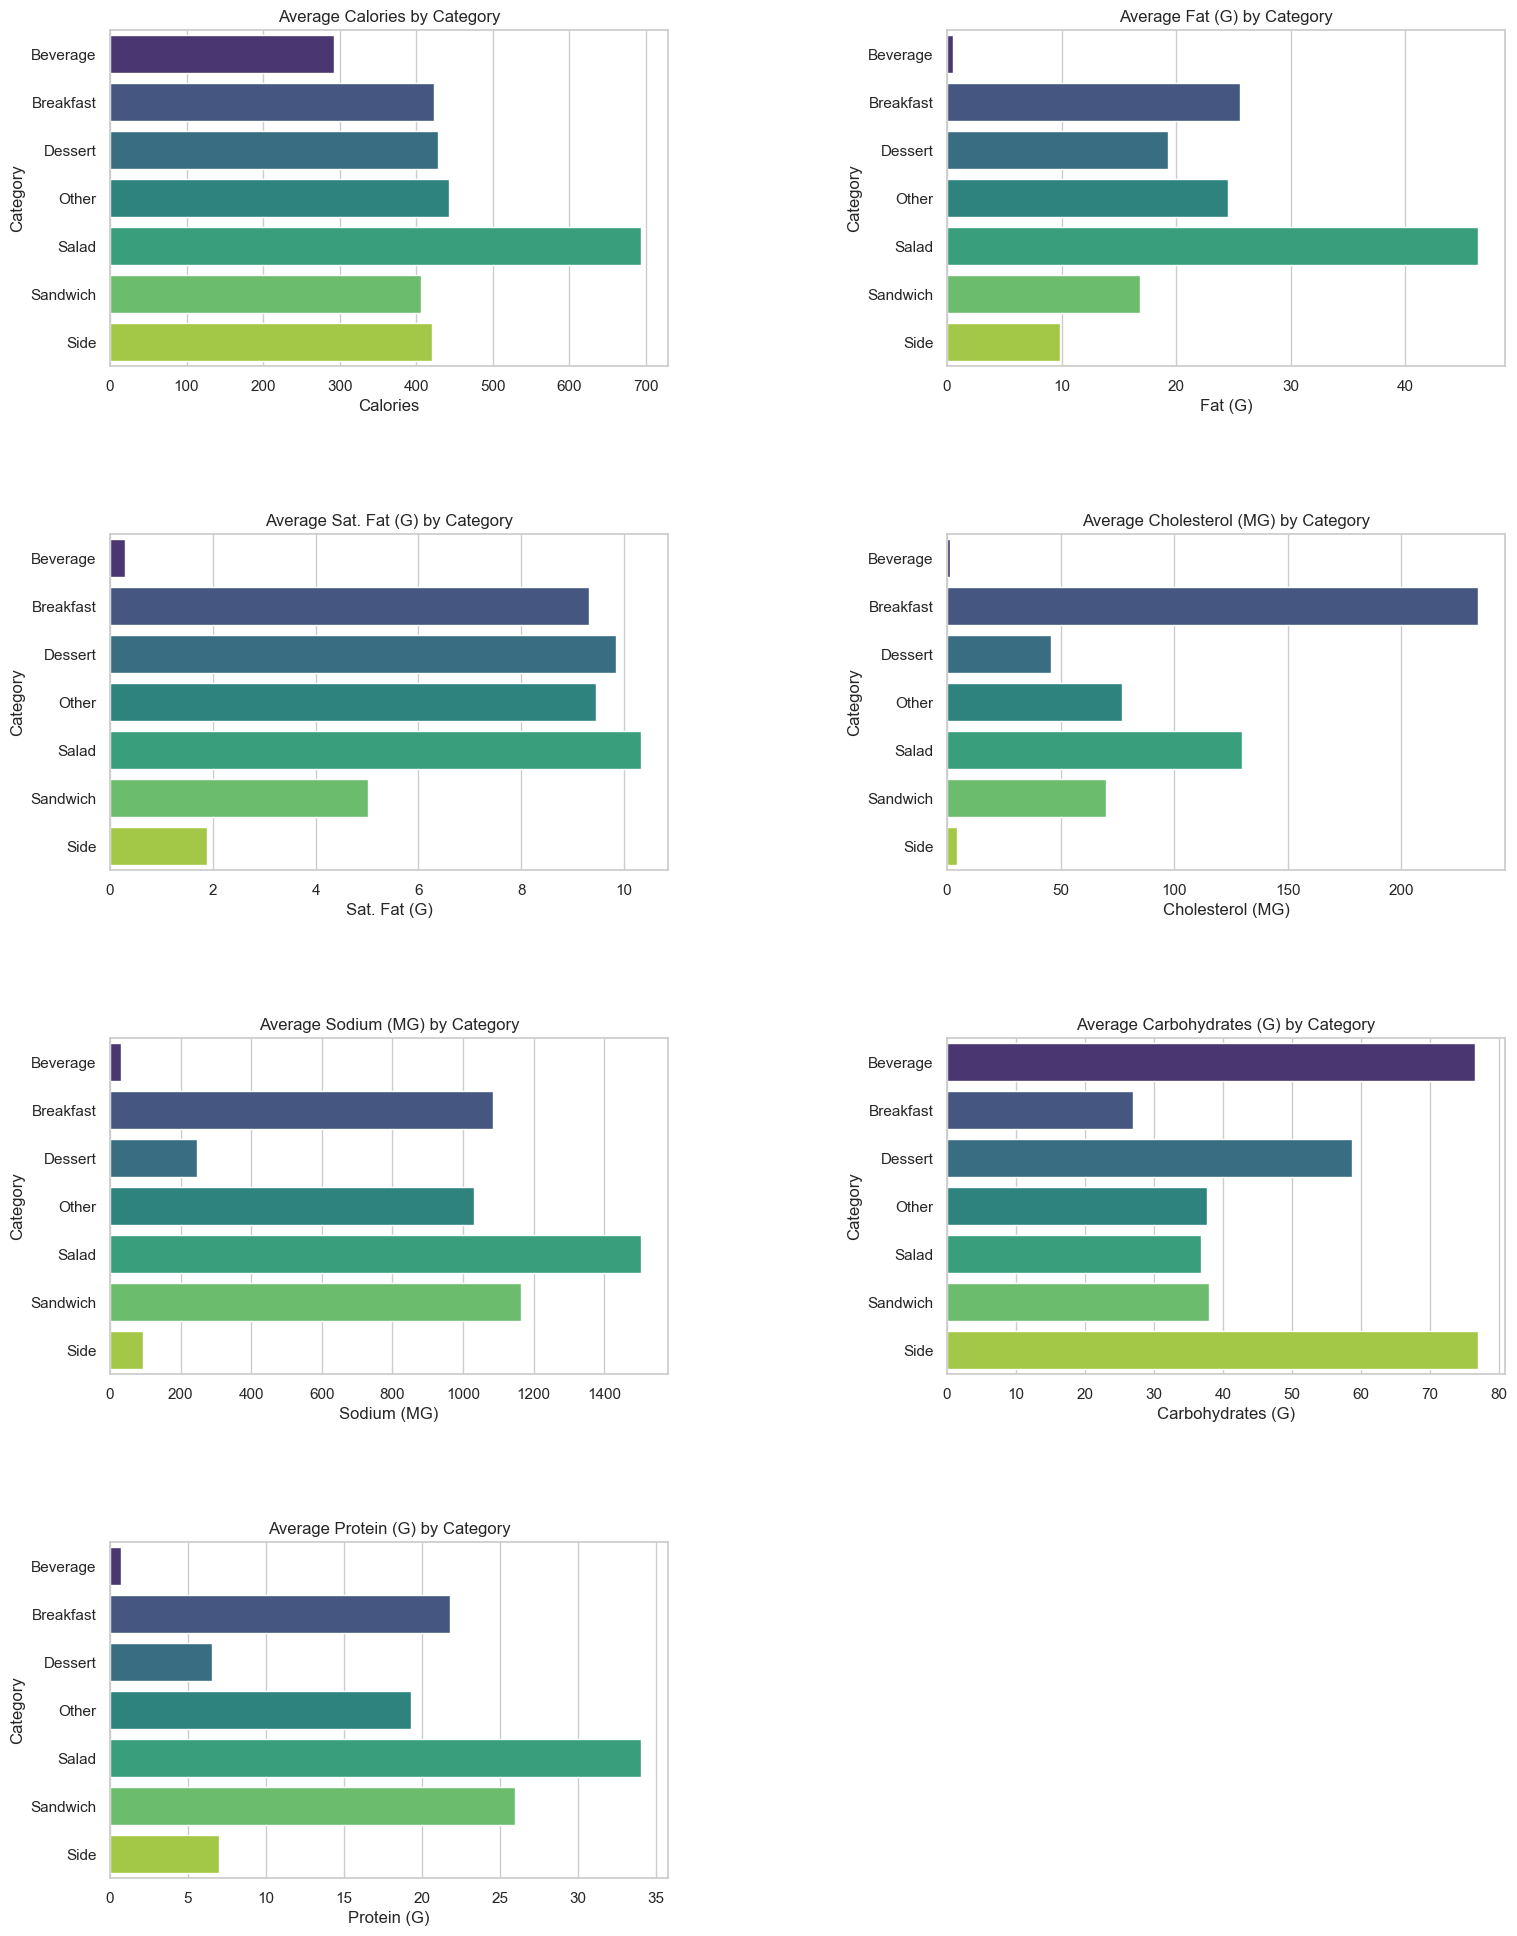

In [64]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()

nutritional_facts = ['Calories', 'Fat (G)', 'Sat. Fat (G)', 'Cholesterol (MG)', 
                     'Sodium (MG)', 'Carbohydrates (G)', 'Protein (G)']

for i, fact in enumerate(nutritional_facts):
    sns.barplot(x=fact, y='Category', data=category_nutritional_means, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {fact} by Category')

# Hide the 8th subplot (extra) as we have only 7 nutritional facts to display
fig.delaxes(axes[-1])

plt.show()


# Healthy & Unhealthy options within each category
# but what what is "healthy"?
- generally, a "healthier" option could be one with lower calories, fat, and sodium, and higher in protein
- healthy score we came up with
- Score = -(Calories per 100g + Fat (G) per 100g + Sodium (MG) per 100g) + (Protein (G) per 100g)

### Most Healthy Options:
Beverage: Small Freshly-Brewed Iced Tea Unsweetened

Breakfast: Hash Brown Scramble Bowl w/ Sausage - no hash browns

Dessert: Strawberry Milkshake

Salad: Large Garden Salad Tray (per tray)

Sandwich: Spicy Southwest Salad w/ No Chicken

Side: Small Fruit Cup

### Least Healthy Options:
Beverage: Frosted Lemonade

Breakfast: Bacon

Dessert: Chocolate Chunk Cookie

Salad: Cobb Salad w/ Spicy Filet

Sandwich: Spicy Chicken Sandwich

Side: Small Chick-fil-A Waffle Potato Fries®

In [65]:
# Define a simple health score formula. For simplicity, let's consider:
# Healthier options have lower calories, lower fat, lower sodium, and higher protein.
# This formula could be more complex in real scenarios to reflect a more accurate nutritional assessment.

# Score = -(Calories per 100g + Fat (G) per 100g + Sodium (MG) per 100g) + (Protein (G) per 100g)
# Note: This is a simplified and not comprehensive health scoring. Real dietary guidelines would consider more factors.
df['Health Score'] = -(df['Calories per 100g'] + df['Fat (G) per 100g'] + df['Sodium (MG) per 100g']) + df['Protein (G) per 100g']

# Identify the most and least healthy option in each category based on the health score
most_healthy_per_category = df.loc[df.groupby('Category')['Health Score'].idxmax()]
least_healthy_per_category = df.loc[df.groupby('Category')['Health Score'].idxmin()]

most_healthy_per_category = most_healthy_per_category[['Category', 'Menu', 'Health Score']]
least_healthy_per_category = least_healthy_per_category[['Category', 'Menu', 'Health Score']]

most_healthy_per_category, least_healthy_per_category


(      Category                                               Menu  \
 157   Beverage          Small Freshly-Brewed Iced Tea Unsweetened   
 27   Breakfast  Hash Brown Scramble Bowl w/ Sausage - no hash ...   
 125    Dessert                               Strawberry Milkshake   
 146      Other                              DASANI® Bottled Water   
 236      Salad                Large Garden Salad Tray  (per tray)   
 37    Sandwich                           Grilled Chicken Sandwich   
 31        Side                                    Small Fruit Cup   
 
      Health Score  
 157     -2.487562  
 27    -667.808219  
 125   -232.524272  
 146      0.000000  
 236   -125.608732  
 37    -542.718447  
 31     -48.039216  ,
       Category                                    Menu  Health Score
 119   Beverage                        Frosted Lemonade   -117.493473
 272  Breakfast                                   Bacon  -2595.000000
 121    Dessert                  Chocolate Chunk Cookie   -

# Clustering (Machine Learning)

- perform clustering on the menu items based on their nutritional content per 100g.
- This approach will help us visualize and understand how menu items group together nutritionally without predefined categories

Clusters Distribution: The menu items are grouped into 5 clusters, with the following distribution

Cluster 0: 28 items

Cluster 1: 115 items

Cluster 2: 108 items

Cluster 3: 18 items

Cluster 4: 18 items

- Principal Component Analysis (PCA) Visualization: The scatter plot visualizes the clustering based on the first two principal components derived from the nutritional content.
- The clusters represent groups of menu items with similar nutritional profiles when normalized per 100g. For example, clusters with higher values on the first principal component (PC1) might represent items with higher fat and calories, whereas those with lower values might represent items with lower calories and possibly higher protein or fiber content.
- This clustering can help us understand the nutritional landscape of Chick-fil-A's menu, identify healthier options, and even guide menu development or customer recommendations. Further analysis could dive into the specific characteristics of each cluster to identify what nutritional traits they share.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


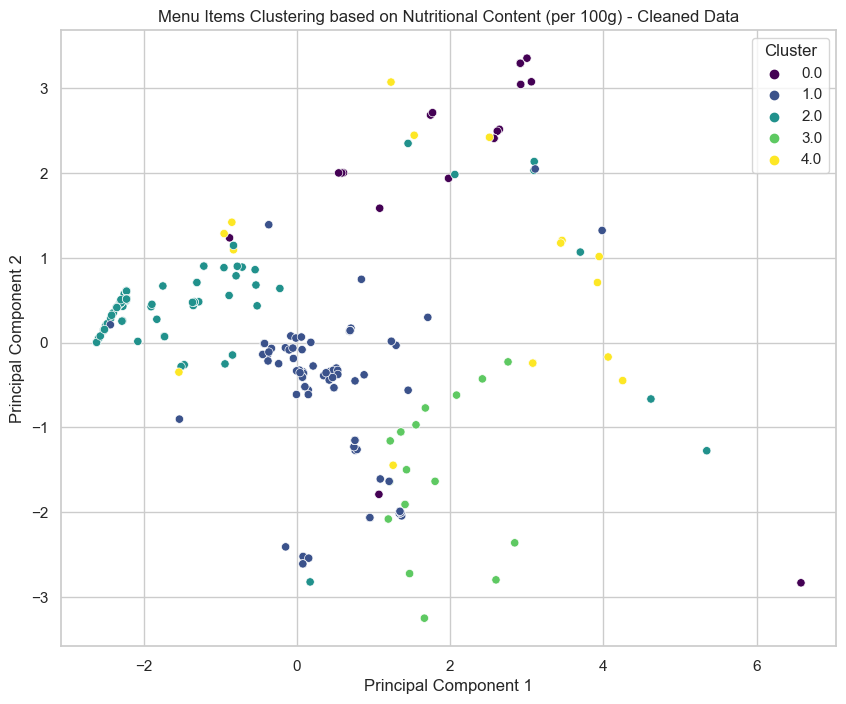

Cluster
1    115
2    108
0     28
3     18
4     18
Name: count, dtype: int64


In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the Chick-fil-A nutritional data
nutritional_facts_per_100g = ['Calories', 'Fat (G)', 'Sat. Fat (G)', 'Cholesterol (MG)', 
                              'Sodium (MG)', 'Carbohydrates (G)', 'Protein (G)']

# Clean the data by removing rows with NaN values in the nutritional facts per 100g columns
data_clean = df.dropna(subset=[f'{fact} per 100g' for fact in nutritional_facts_per_100g]).copy()

# Standardizing the data
scaler = StandardScaler()
scaled_features_clean = scaler.fit_transform(data_clean[[f'{fact} per 100g' for fact in nutritional_facts_per_100g]])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(scaled_features_clean)

# Apply PCA for visualization
pca_clean = PCA(n_components=2)
principalComponents_clean = pca_clean.fit_transform(scaled_features_clean)
principalDf_clean = pd.DataFrame(data=principalComponents_clean, columns=['PC1', 'PC2'])

# Adding cluster labels to PCA DataFrame for plotting
principalDf_clean['Cluster'] = data_clean['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", palette='viridis', data=principalDf_clean)
plt.title('Menu Items Clustering based on Nutritional Content (per 100g) - Cleaned Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Displaying the updated cluster distribution
cluster_distribution_clean = data_clean['Cluster'].value_counts()
print(cluster_distribution_clean)


# Profiling Clusters

In [77]:
# Calculate the mean of nutritional facts per 100g for each cluster
cluster_nutritional_means = data_clean.groupby('Cluster')[[f'{fact} per 100g' for fact in nutritional_facts_per_100g]].mean()

# Display the average nutritional facts per 100g for each cluster
cluster_nutritional_means



,Calories per 100g,Fat (G) per 100g,Sat. Fat (G) per 100g,Cholesterol (MG) per 100g,Sodium (MG) per 100g,Carbohydrates (G) per 100g,Protein (G) per 100g
Cluster,,,,,,,
0,435.429658,22.866696,6.677812,22.806436,402.805661,53.514927,4.735808
1,202.927658,9.828349,2.330039,46.912366,643.522565,13.519630,15.339612
2,57.945112,1.399486,0.490073,2.936473,103.686400,10.493714,1.197574
3,226.783896,14.348519,5.287163,170.221842,577.868102,11.915054,12.624814
4,461.206185,41.807899,10.186694,57.552336,873.575675,9.820432,13.305940


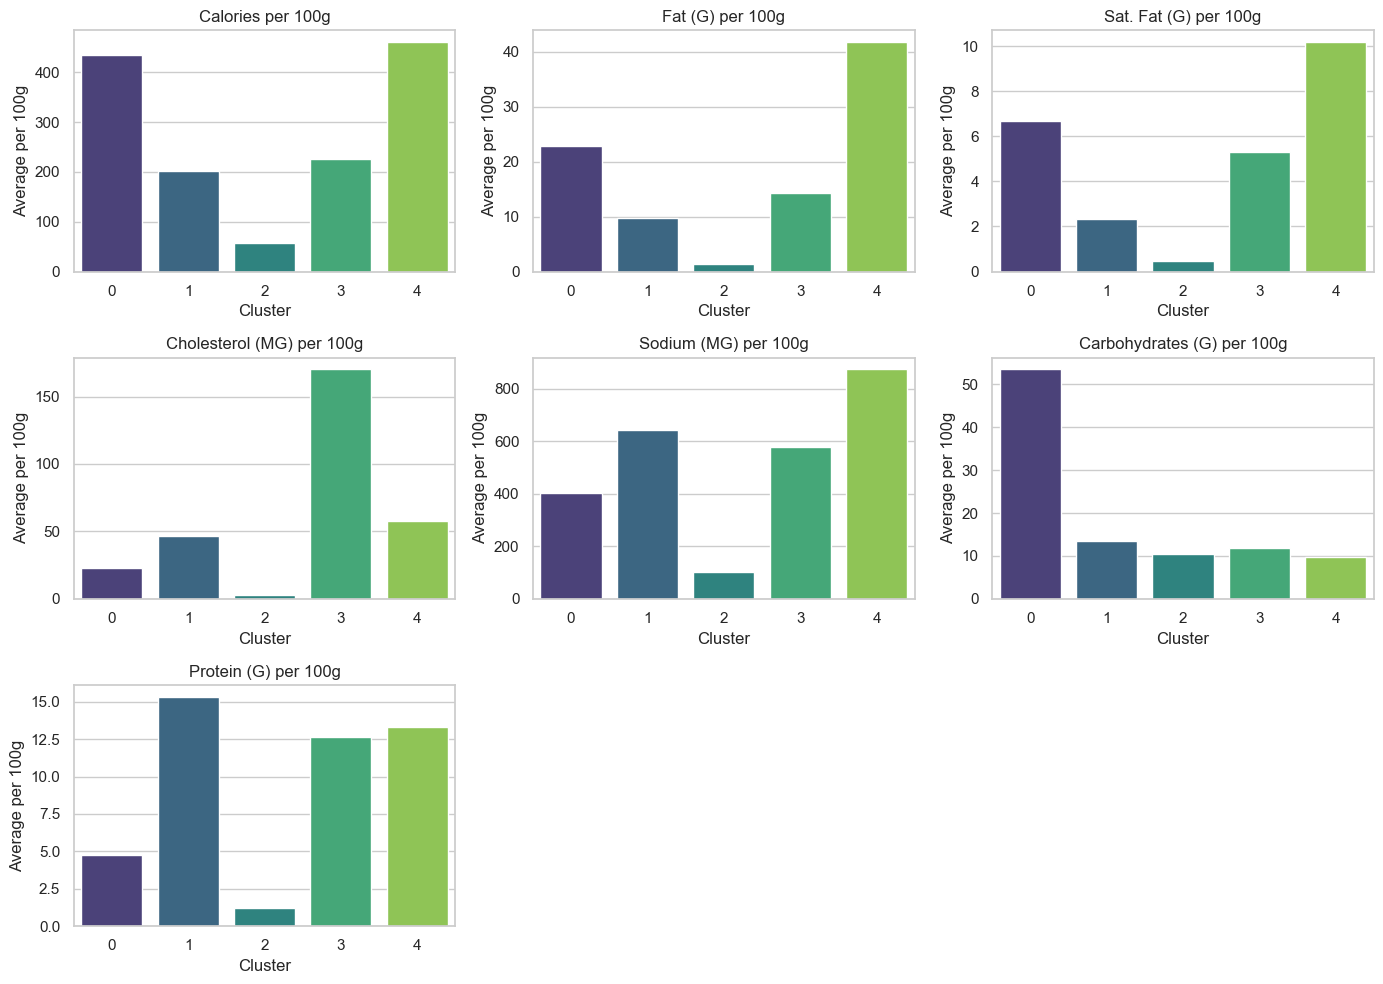

In [78]:
# Transpose the cluster nutritional means for easier plotting
cluster_nutritional_means_transposed = cluster_nutritional_means.transpose()

# Create a bar chart for each nutritional fact
plt.figure(figsize=(14, 10))

# Plotting each nutritional fact by cluster
for i, nutritional_fact in enumerate(cluster_nutritional_means_transposed.index):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=cluster_nutritional_means_transposed.columns, y=cluster_nutritional_means_transposed.loc[nutritional_fact], palette='viridis')
    plt.title(nutritional_fact)
    plt.ylabel('Average per 100g')
    plt.xlabel('Cluster')

plt.tight_layout()
plt.show()


The visualizations above display the average values for each major nutritional fact per 100g across the clusters, highlighting the distinct nutritional profiles of each cluster. From the bar charts, you can observe:

- **Calories and Fat**: Cluster 4 stands out with the highest average calories and fat per 100g, indicating it contains the most energy-dense and fatty items. Cluster 2 is on the opposite end, with the lowest averages, suggesting it consists of lighter options.
    
- **Saturated Fat**: Similar to total fat, Cluster 4 has the highest average saturated fat, reinforcing its profile of containing richer, possibly fried or creamy items.
    
- **Cholesterol**: Cluster 3 shows a significantly higher average cholesterol content, likely due to the presence of animal-based proteins.
    
- **Sodium**: Again, Cluster 4 has the highest sodium content, which may reflect items with added sauces or dressings that are high in sodium.
    
- **Carbohydrates**: Cluster 0 has the highest average carbohydrates, suggesting it includes carb-heavy items such as desserts, breads, or other baked goods.
    
- **Protein**: Cluster 3 and Cluster 4 have higher protein averages, indicating a good representation of meat-based dishes that are protein-rich.
    

These charts provide a clear view of the nutritional emphasis within each cluster, from high-protein and high-cholesterol items that might be more suitable for those looking for filling, meat-based options, to low-calorie and low-fat items in Cluster 2 for those seeking lighter fare. Cluster 4's high fat, saturated fat, and sodium content mark it as the cluster with the richest, most indulgent menu items.

This analysis offers valuable insights for dietary planning, menu optimization, or providing recommendations based on specific nutritional preferences or restrictions.